# Code for summarizing the xiRT results on the FAIMS data

Please see the README.md to get information about the result files.

In [53]:
import seaborn as sns
import pandas as pd
import glob
import matplotlib.pyplot as plt


In [54]:
path = "../bash/results/xirt/"
files = glob.glob(path + "*summary*.csv", recursive=True)
df_results = pd.concat([pd.read_csv(i, index_col=0) for i in files])
df_results.head(5)


,r2,pearsonr,split,yaml
0,0.420,0.648,validation,xirt_faims_ordinal_aux3
1,0.288,0.537,training,xirt_faims_ordinal_aux3
2,0.248,0.498,prediction,xirt_faims_ordinal_aux3
3,0.050,0.224,validation,xirt_faims_ordinal_aux3
4,0.087,0.295,training,xirt_faims_ordinal_aux3


In [55]:
df_melt = df_results.melt(id_vars=["split", "yaml"])
df_melt.head(5)

,split,yaml,variable,value
0,validation,xirt_faims_ordinal_aux3,r2,0.420
1,training,xirt_faims_ordinal_aux3,r2,0.288
2,prediction,xirt_faims_ordinal_aux3,r2,0.248
3,validation,xirt_faims_ordinal_aux3,r2,0.050
4,training,xirt_faims_ordinal_aux3,r2,0.087


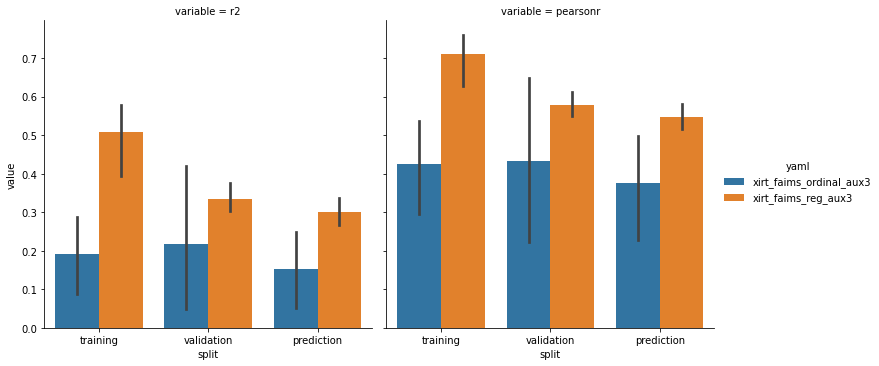

In [57]:
sns.catplot(x="split", y="value", hue="yaml", col="variable", data=df_melt, kind="bar", order=["training", "validation", "prediction"])

# Results
The above plot shows the training and validation error depending on the used parameters for xiRT. Both R2 and PearsonR are best optimized towards 1
Take aways:
- ordinal regression seems to be slightly more robust than normal regression (smaller error bar + slightly better performance)
- train and test behavior is very similar
- auxillary tasks ...